In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sn

In [2]:
df = pd.read_csv("covid-19.csv")

In [3]:
df

,Unnamed: 0,Country,Date,Confirmed,Death,newConfirmed,newDeath
0,1,Afghanistan,2019-12-31,0,0,0,0
1,2,Afghanistan,2020-01-01,0,0,0,0
2,3,Afghanistan,2020-01-02,0,0,0,0
3,4,Afghanistan,2020-01-03,0,0,0,0
4,5,Afghanistan,2020-01-04,0,0,0,0
...,...,...,...,...,...,...,...
27545,28008,Zimbabwe,2020-06-14,383,4,27,0
27546,28009,Zimbabwe,2020-06-15,387,4,4,0
27547,28010,Zimbabwe,2020-06-16,391,4,4,0
27548,28011,Zimbabwe,2020-06-17,401,4,10,0


In [4]:
df=df.drop('Unnamed: 0',axis='columns')

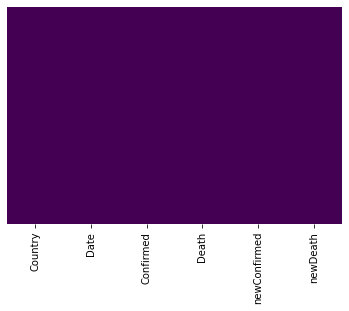

In [5]:
sn.heatmap(df.isnull(),cmap='viridis',yticklabels=False,cbar=False)

In [6]:
df.shape

(27550, 6)

In [7]:
df.describe()

,Confirmed,Death,newConfirmed,newDeath
count,2.755000e+04,27550.000000,27550.000000,27550.000000
mean,1.273659e+04,790.741198,308.127586,16.478475
std,8.421336e+04,5387.391515,1852.325345,111.893189
min,0.000000e+00,0.000000,-10034.000000,-1918.000000
25%,0.000000e+00,0.000000,0.000000,0.000000
50%,7.400000e+01,1.000000,1.000000,0.000000
75%,1.512750e+03,32.000000,41.000000,1.000000
max,2.191052e+06,118434.000000,36291.000000,2620.000000


In [8]:
df=df.rename(columns={ "Confirmed":"confirm","Death": "death","newConfirmed":"newconfirm",'newDeath':'newdeath'})
df.head()

,Country,Date,confirm,death,newconfirm,newdeath
0,Afghanistan,2019-12-31,0,0,0,0
1,Afghanistan,2020-01-01,0,0,0,0
2,Afghanistan,2020-01-02,0,0,0,0
3,Afghanistan,2020-01-03,0,0,0,0
4,Afghanistan,2020-01-04,0,0,0,0


In [9]:
country = df.groupby("Country")[['confirm' ,'death','newconfirm','newdeath']].sum().reset_index()

In [10]:
country.head()

,Country,confirm,death,newconfirm,newdeath
0,Afghanistan,646624,12976,27532,546
1,Albania,71576,2422,1788,39
2,Algeria,473539,39564,11385,811
3,Andorra,60642,3395,855,52
4,Angola,4335,240,165,8


In [11]:
top_10_death = country.sort_values(by='death',axis=0,ascending=False)[:10]
print(top_10_death)

            Country    confirm    death  newconfirm  newdeath
178              US  102004561  5774419     2191052    118434
88            Italy   17299484  2347183      238159     34514
182  United Kingdom   15744774  2257311      301935     42373
162           Spain   17445190  1926066      245268     27136
64           France   13141982  1880315      195272     29606
24           Brazil   22635171  1279170      978142     47748
17          Belgium    3841492   582729       60348      9683
84             Iran    9694505   544450      197647      9272
69          Germany   13313882   519194      189817      8875
37            China   10810695   491355       84467      4638


In [12]:
sn.set(style="whitegrid" ,rc={'figure.figsize':{10,5}},palette="Blues")

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

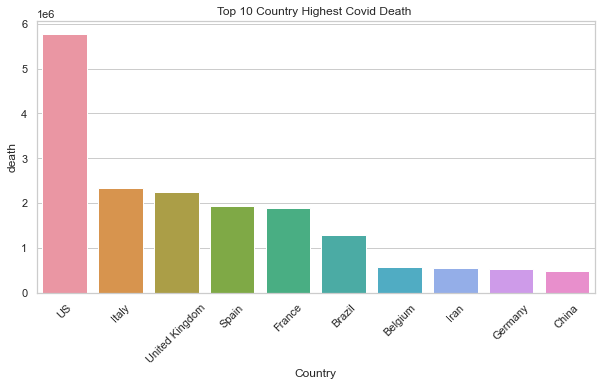

In [13]:
sn.barplot(x='Country',y="death",data=top_10_death)
plt.title("Top 10 Country Highest Covid Death ")
plt.xticks(rotation=45)

In [14]:
top_10_confirm= country.sort_values(by='confirm',axis=0,ascending=False)[:10]
top_10_confirm

,Country,confirm,death,newconfirm,newdeath
178,US,102004561,5774419,2191052,118434
24,Brazil,22635171,1279170,978142,47748
144,Russia,18191073,204946,560321,7650
162,Spain,17445190,1926066,245268,27136
88,Italy,17299484,2347183,238159,34514
182,United Kingdom,15744774,2257311,301935,42373
69,Germany,13313882,519194,189817,8875
64,France,13141982,1880315,195272,29606
37,China,10810695,491355,84467,4638
177,Turkey,9798853,260063,184031,4882


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

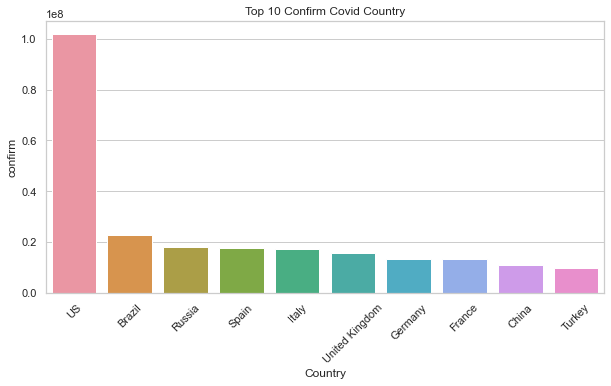

In [15]:
sn.barplot(x='Country',y="confirm",data=top_10_confirm)
plt.title("Top 10 Confirm Covid Country")
plt.xticks(rotation=45)